In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

# Loading the Data

In [4]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [5]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


# Data Pre-processing

3.a Checking of Duplicates

In [7]:
sum(train.duplicated())
sum(test.duplicated())

0

3.b Checking for missing values

In [8]:
train.isna().values.sum()
test.isna().values.sum()

0

3.c Checking for class imbalance

In [9]:
sns.countplot(train.Activity,data=train.sort_values('train.A',ascending=False))

KeyError: 'train.A'

# 4. EXploratory Data Analysis

In [10]:
pd.DataFrame.from_dict(Counter([col.split('-')[0].split('(')[0] for col in train.columns]),orient="index").rename(columns={0:'count'}).sort_values("count",ascending=False)

,count
fBodyAcc,79
fBodyGyro,79
fBodyAccJerk,79
tGravityAcc,40
tBodyAcc,40
tBodyGyroJerk,40
tBodyGyro,40
tBodyAccJerk,40
tBodyAccMag,13
tGravityAccMag,13


4.a Analyzing tbodyAccMag-mean feature

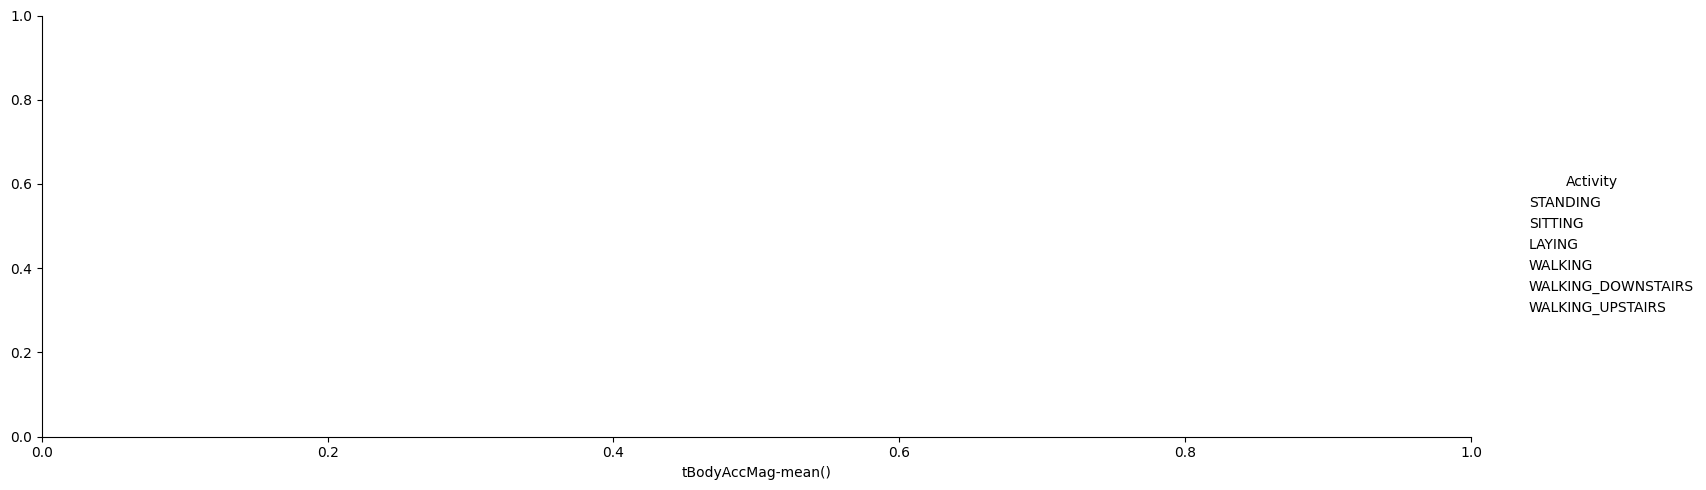

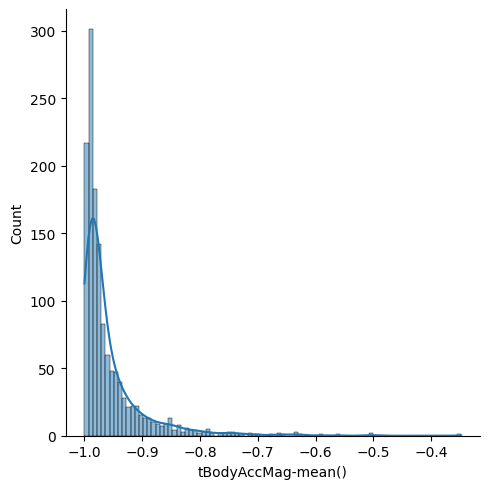

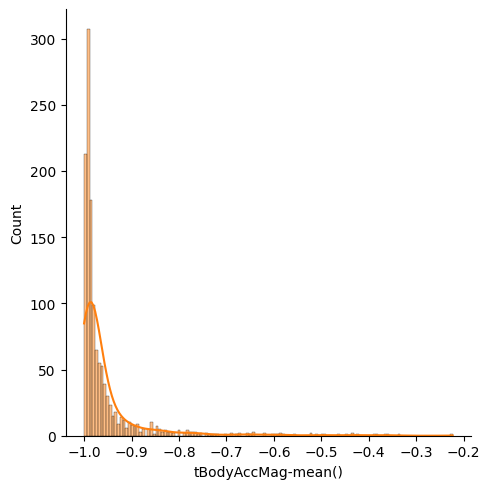

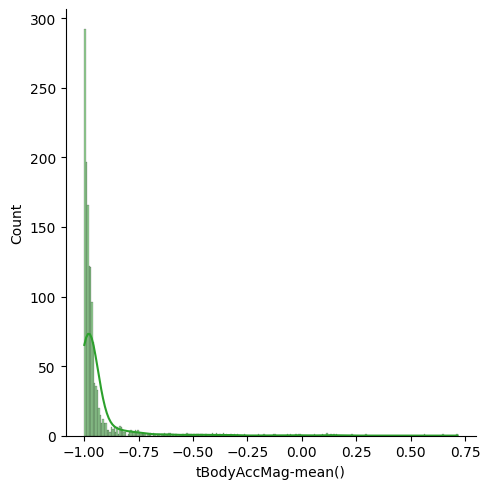

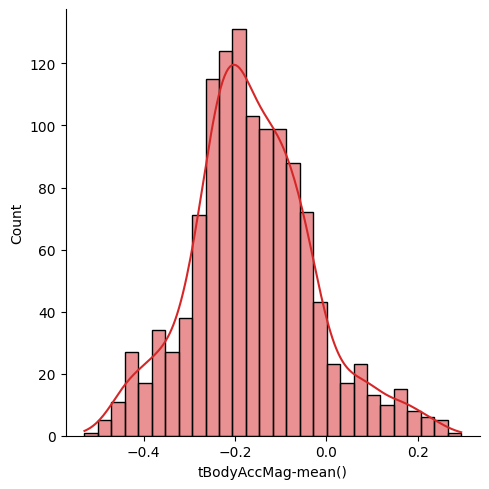

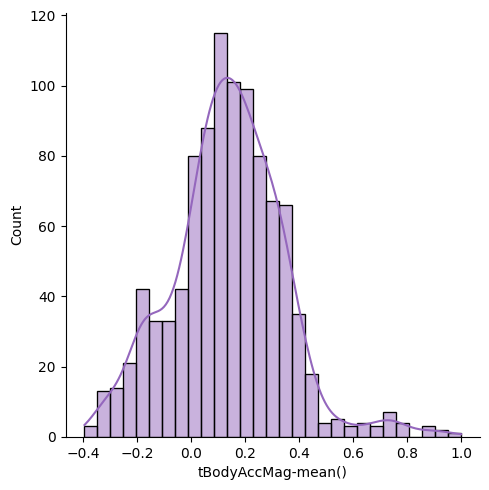

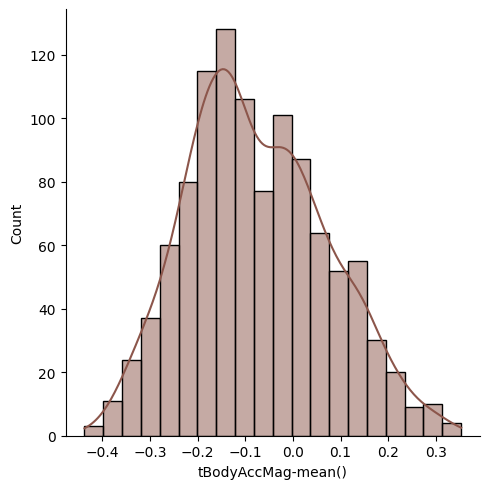

In [11]:

facetgrid=sns.FacetGrid(train,hue='Activity',height=5,aspect=3)
facetgrid.map(sns.displot,'tBodyAccMag-mean()',kde=True).add_legend()


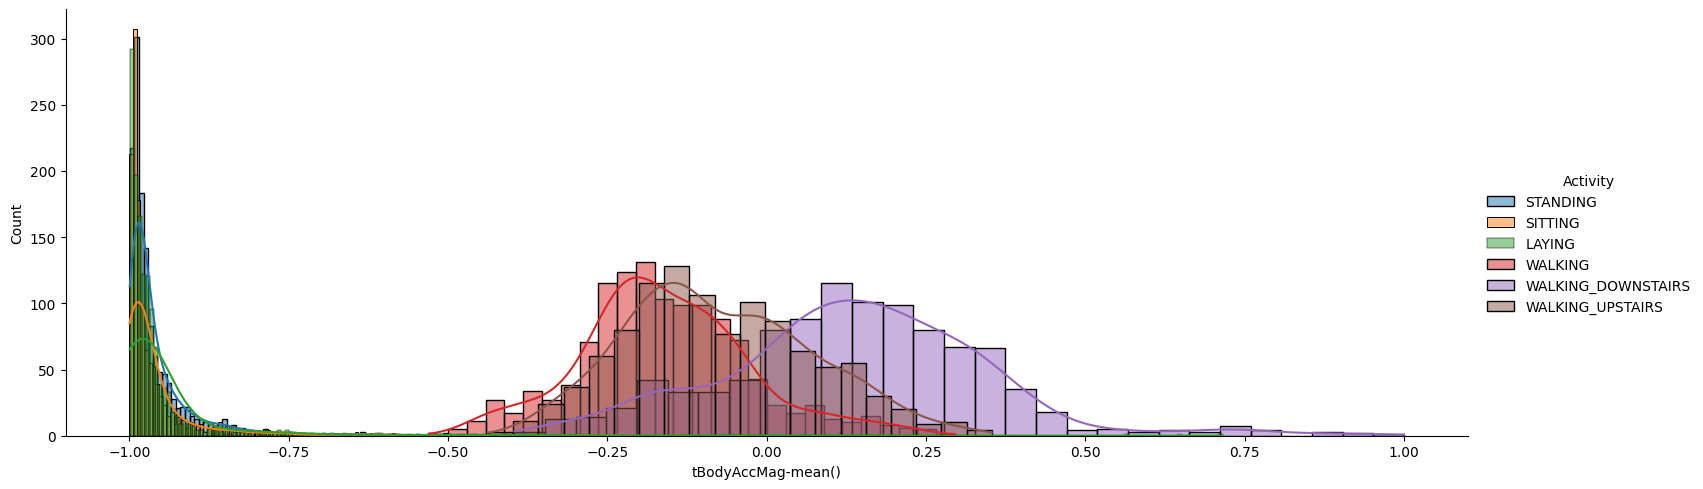

In [12]:
facetgrid=sns.FacetGrid(train,hue='Activity',height=5,aspect=3)
facetgrid.map(sns.histplot,'tBodyAccMag-mean()',kde=True).add_legend()
plt.show()

Text(0.5, 1.0, 'Boxplot column of tBodyAccMag-mean of various activities')

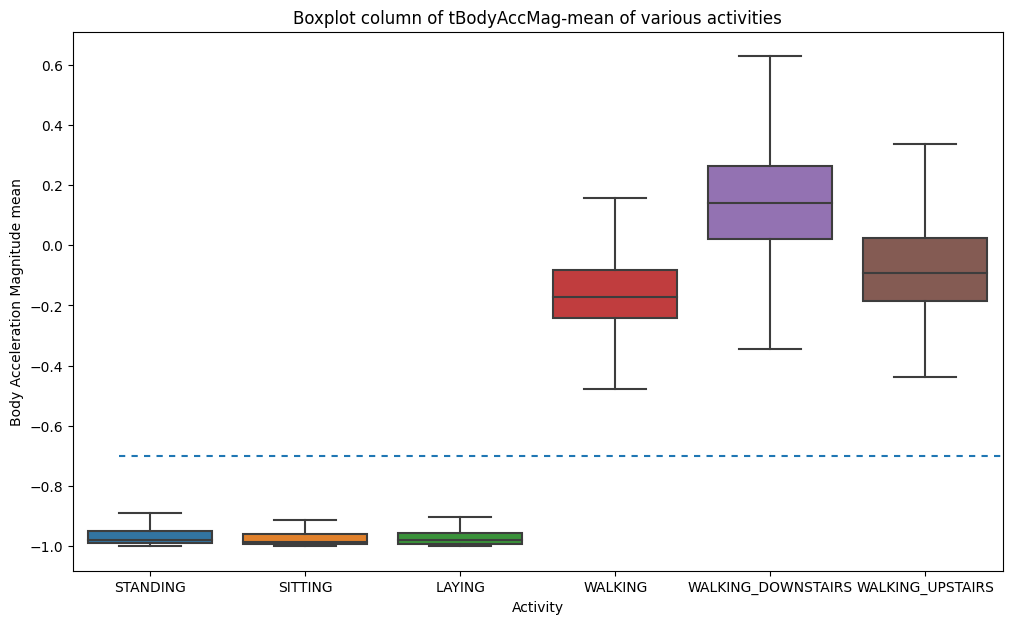

In [13]:
plt.figure(figsize=(12,7))

sns.boxplot(x="Activity",y="tBodyAccMag-mean()",data=train,showfliers=False)
plt.ylabel("Body Acceleration Magnitude mean")
plt.axhline(y=-0.7,xmin=0.05,dashes=(3,3))
plt.title("Boxplot column of tBodyAccMag-mean of various activities")

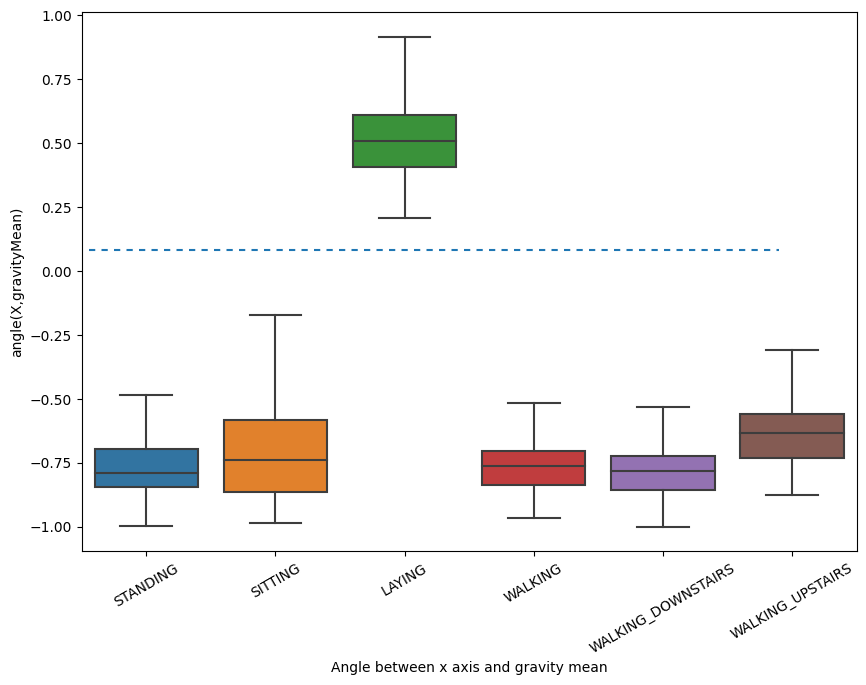

In [14]:
plt.figure(figsize=(10,7))
sns.boxplot(x="Activity",y='angle(X,gravityMean)',data=train,showfliers=False)
plt.axhline(y=0.08,xmin=0.01,xmax=0.9,dashes=(3,3))
plt.xlabel("Angle between x axis and gravity mean")
plt.xticks(rotation=30)
plt.show()

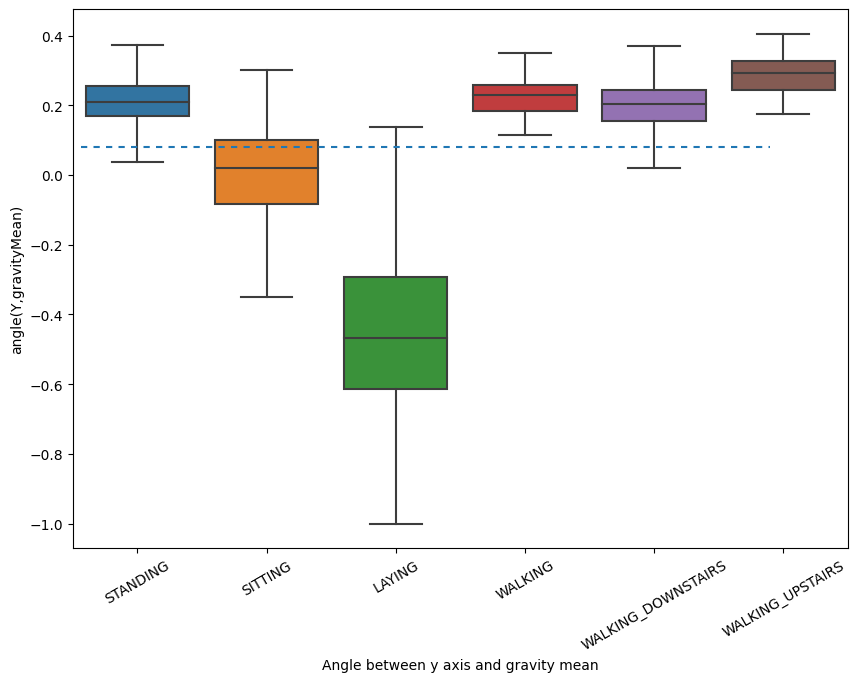

In [15]:
plt.figure(figsize=(10,7))
sns.boxplot(x="Activity",y='angle(Y,gravityMean)',data=train,showfliers=False)
plt.axhline(y=0.08,xmin=0.01,xmax=0.9,dashes=(3,3))
plt.xlabel("Angle between y axis and gravity mean")
plt.xticks(rotation=30)
plt.show()

4.d Visualizing the data using PCA

In [16]:
x_for_pca=train.drop(['subject','Activity'],axis=1)
pca=PCA(n_components=2,random_state=0).fit_transform(x_for_pca)

In [17]:
pca

array([[-5.5202803 , -0.29027701],
       [-5.53534954, -0.08253011],
       [-5.47498801,  0.28738703],
       ...,
       [ 5.85750527, -3.08184312],
       [ 5.42109482, -3.42643002],
       [ 5.49797027, -2.78992867]])

In [18]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


4.e Visualizing data using PCA

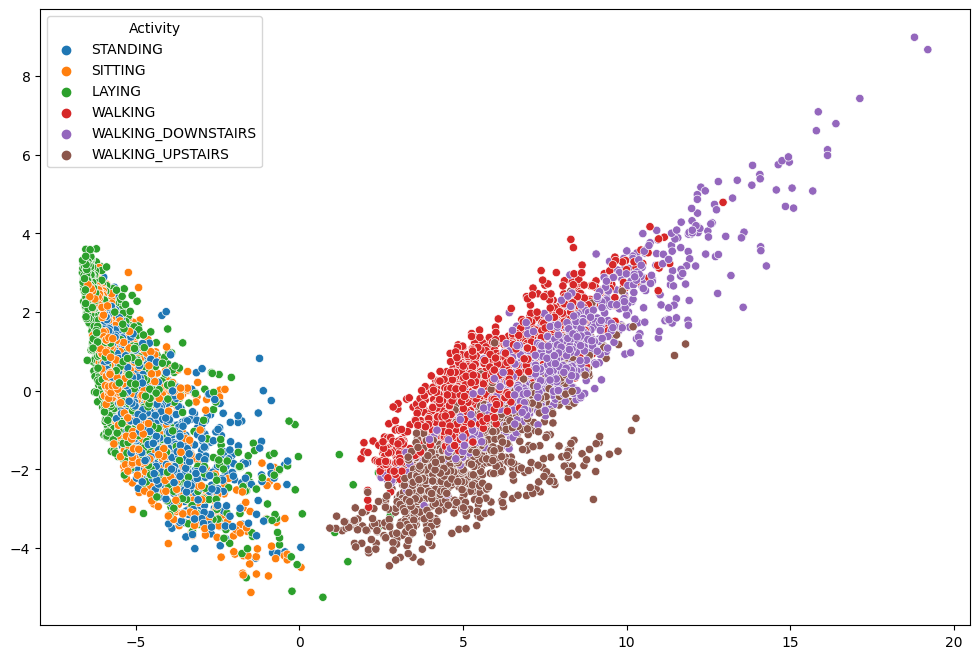

In [19]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=pca[:,0],y=pca[:,1],hue=train['Activity'])
plt.show()

4.f Visualizing data using tSNE

In [20]:
x_for_tsne=train.drop(['subject','Activity'],axis=1)
tsne=TSNE(n_components=2,random_state=0,n_iter=1000).fit_transform(x_for_tsne)

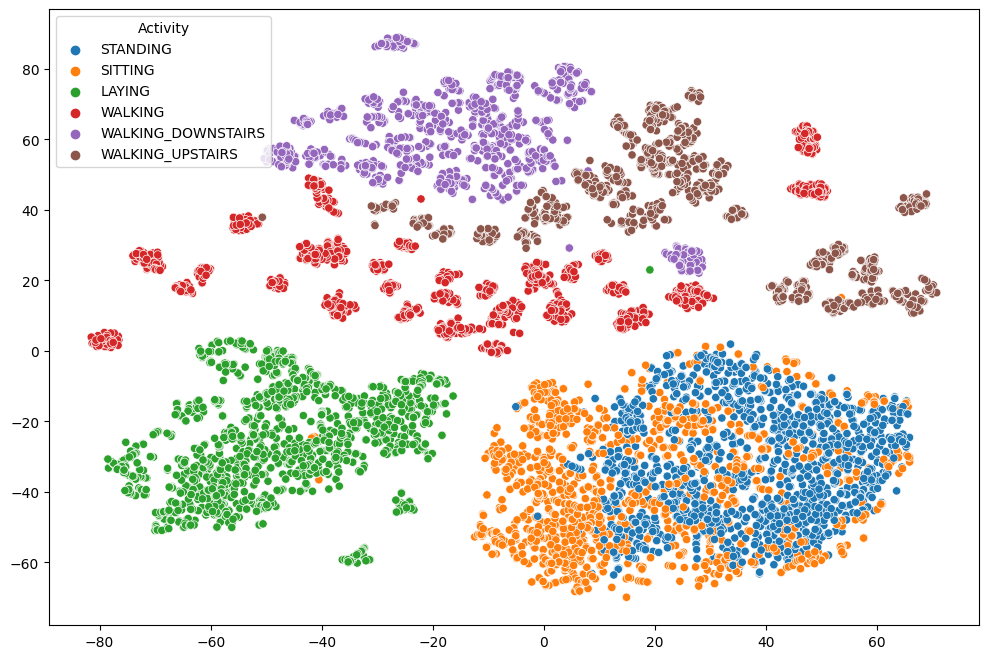

In [21]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=tsne[:,0],y=tsne[:,1],hue=train['Activity'])
plt.show()

# 5. ML Models

5.a Getting training and test data ready

In [22]:
xtrain=train.drop(['subject','Activity'],axis=1)
ytrain=train.Activity

xtest=test.drop(['subject','Activity'],axis=1)
ytest=test.Activity

In [23]:
xtrain.shape

(7352, 561)

In [24]:
xtest.shape

(999, 561)

5.b Logistic regression model with hyperparameter tuning and cross validation

In [25]:
parameters={'max_iter' :[100,200,500]}
lr_classifier=LogisticRegression()
lr_classifier_rs=RandomizedSearchCV(lr_classifier,param_distributions=parameters,cv=5,random_state=42)
lr_classifier_rs.fit(xtrain,ytrain)
y_pred_lr=lr_classifier_rs.predict(xtest)

In [26]:
lr_accuracy=accuracy_score(y_true=ytest,y_pred=y_pred_lr)
print("Accuracy using Logistic Regression: ",lr_accuracy)

Accuracy using Logistic Regression:  0.955955955955956


In [27]:
#function to plot confusion matrix
def plot_confusion_matrix(cm,labels):
    fig,ax=plt.subplots(figsize=(12,8))
    im=ax.imshow(cm,interpolation="nearest",cmap=plt.cm.Blues)
    ax.figure.colorbar(im,ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
          yticks=np.arange(cm.shape[0]),
          xticklabels=labels,yticklabels=labels,
          ylabel='True Label',
          xlabel='Predicted Label')
    plt.xticks(rotation=90)
    thresh=cm.max()/2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j,i,int(cm[i,j]),ha="center",va="center",color="white" if cm[i,j]>thresh else "black")
    fig.tight_layout()

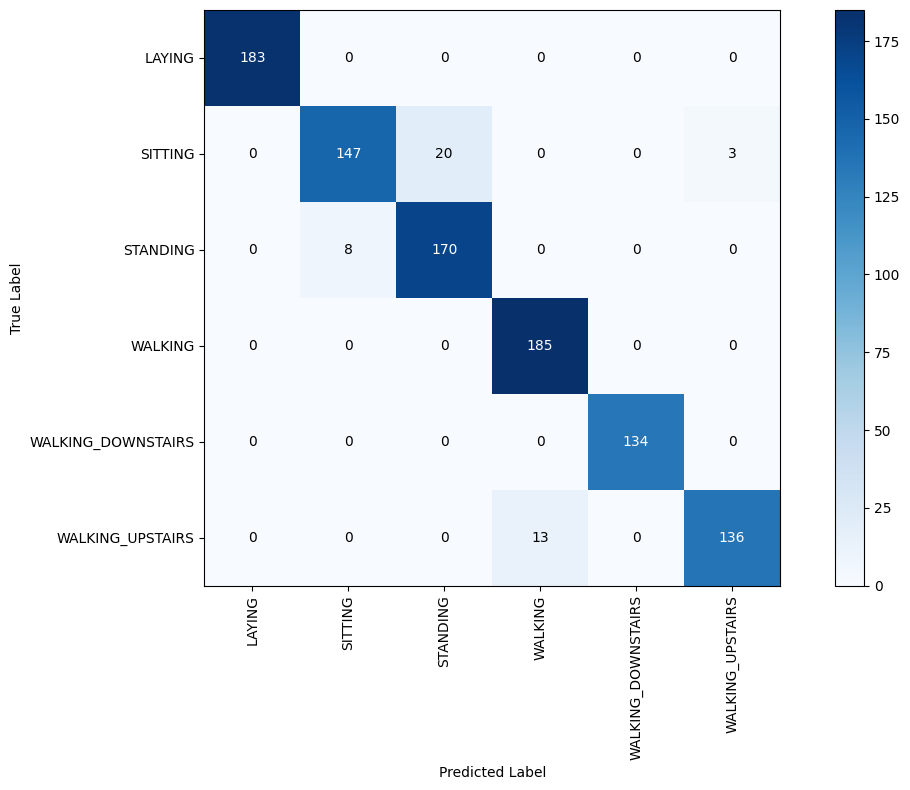

In [28]:
cm=confusion_matrix(ytest.values,y_pred_lr)
plot_confusion_matrix(cm,np.unique(y_pred_lr))

In [29]:
#function to get the best random search attribute
def get_best_randomsearch_results(model):
    print("Best Estimator : ",model.best_estimator_)
    print("Best set of parameters : ",model.best_params_)

In [30]:
get_best_randomsearch_results(lr_classifier_rs)

Best Estimator :  LogisticRegression(max_iter=200)
Best set of parameters :  {'max_iter': 200}


5.c Kernel SVM with hyperparameter tuning and cross validation

In [32]:
parameters={
    'kernel':['linear','rbf','poly','sigmoid'],
    'C':[100,50]
}

svm_rs=RandomizedSearchCV(SVC(),param_distributions=parameters,cv=3,random_state=42)
svm_rs.fit(xtrain,ytrain)

RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': [100, 50],
                                        'kernel': ['linear', 'rbf', 'poly',
                                                   'sigmoid']},
                   random_state=42)

In [38]:
y_pred=svm_rs.predict(xtest)

In [39]:
kernel_svm_accuracy=accuracy_score(y_true=ytest,y_pred=y_pred)
print("Accuracy using kernel SVM: ",kernel_svm_accuracy)

Accuracy using kernel SVM:  0.965965965965966


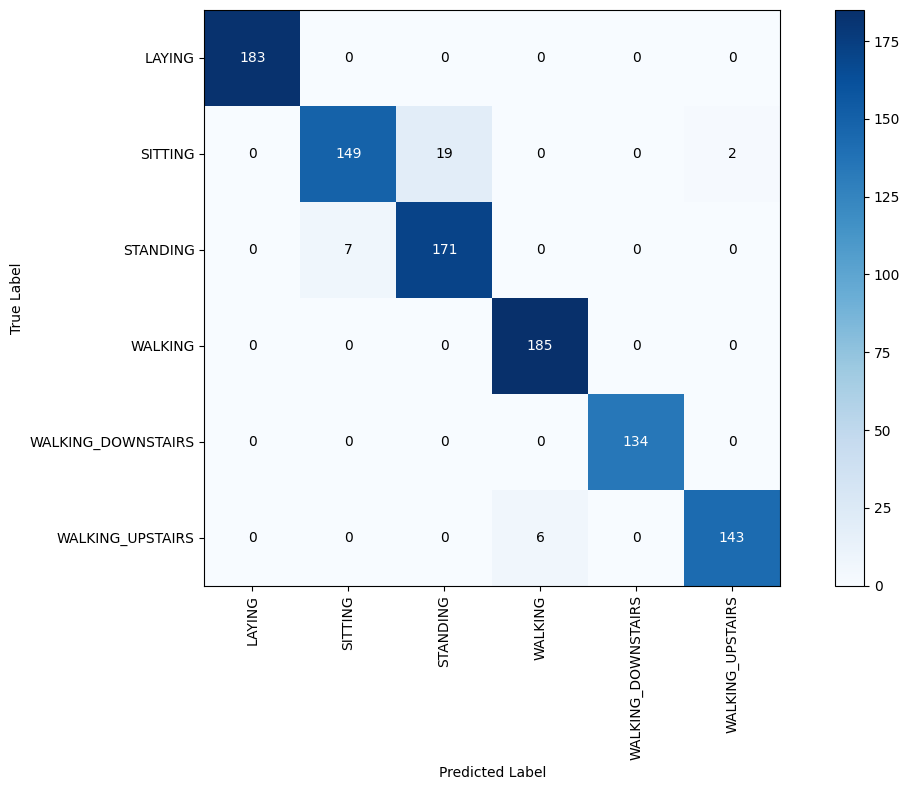

In [40]:
cm=confusion_matrix(ytest.values,y_pred)
plot_confusion_matrix(cm,np.unique(y_pred))

In [41]:
get_best_randomsearch_results(svm_rs)

Best Estimator :  SVC(C=50)
Best set of parameters :  {'kernel': 'rbf', 'C': 50}


5.c Decision Tree Model with Hyperparameter Tuning and Cross-Validation

In [42]:
parameters={"max_depth":np.arange(2,10,2)}
dt_classifier=DecisionTreeClassifier()
dt_classifier_rs=RandomizedSearchCV(dt_classifier,param_distributions=parameters,random_state=42)
dt_classifier_rs.fit(xtrain,ytrain)

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': array([2, 4, 6, 8])},
                   random_state=42)

In [43]:
y_pred=dt_classifier_rs.predict(xtest)


In [44]:
dt_accuracy=accuracy_score(y_true=ytest,y_pred=y_pred)
print("Accuracy score using Decision Tree: ",dt_accuracy)

Accuracy score using Decision Tree:  0.8458458458458459


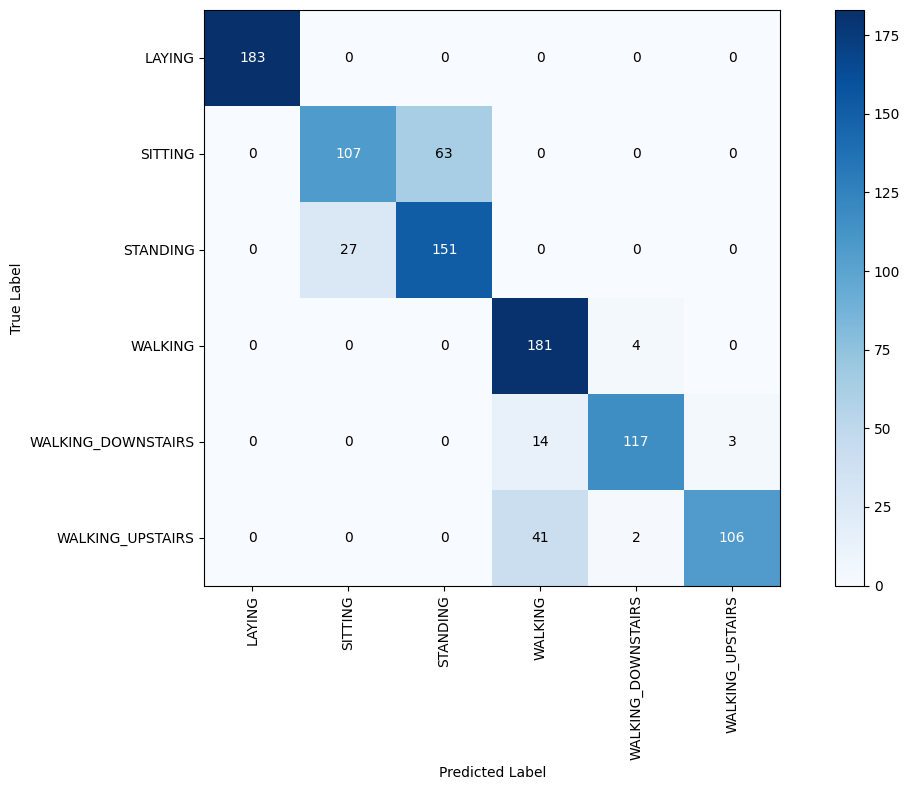

In [45]:
cm=confusion_matrix(ytest.values,y_pred)
plot_confusion_matrix(cm,np.unique(y_pred))

In [46]:
get_best_randomsearch_results(dt_classifier_rs)

Best Estimator :  DecisionTreeClassifier(max_depth=8)
Best set of parameters :  {'max_depth': 8}


5.d Random Forest with Hyperparameter Tuning and Cross-Validation

In [48]:
parameters={
    'n_estimators': np.arange(20,101,10),
    'max_depth':np.arange(2,17,2)
}

rf_classifier=RandomForestClassifier()
rf_classifier_rs=RandomizedSearchCV(rf_classifier,param_distributions=parameters,random_state=42)
rf_classifier_rs.fit(xtrain,ytrain)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': array([ 2,  4,  6,  8, 10, 12, 14, 16]),
                                        'n_estimators': array([ 20,  30,  40,  50,  60,  70,  80,  90, 100])},
                   random_state=42)

In [49]:
y_pred=rf_classifier_rs.predict(xtest)


In [50]:
rf_accuracy=accuracy_score(y_true=ytest,y_pred=y_pred)
print("Accuracy score using Decision Tree: ",rf_accuracy)

Accuracy score using Decision Tree:  0.918918918918919


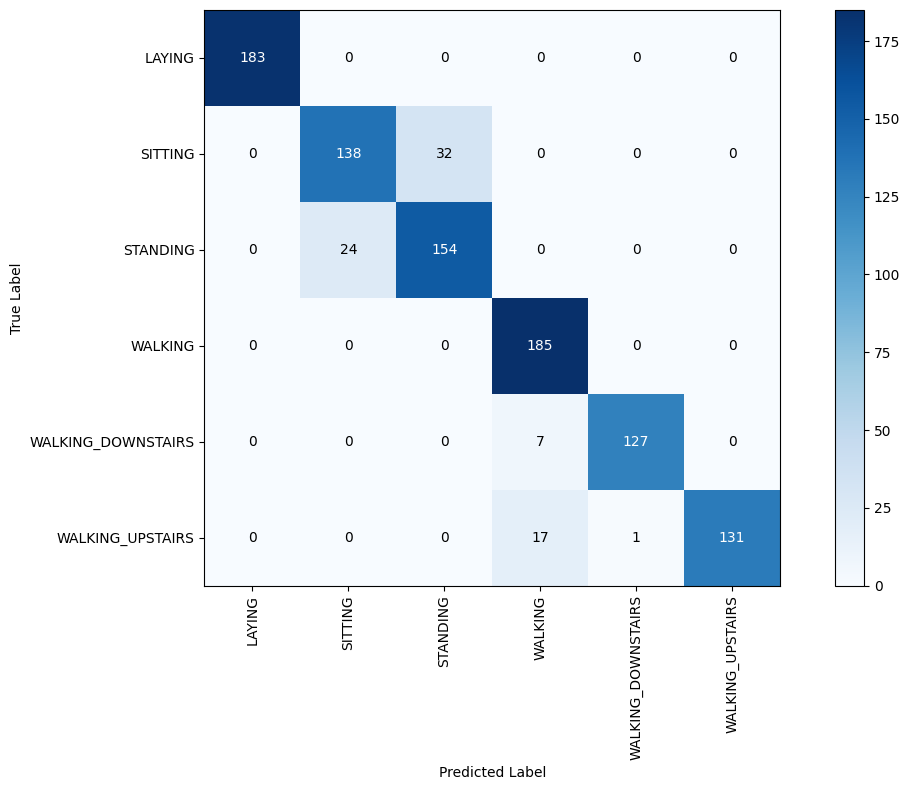

In [51]:
cm=confusion_matrix(ytest.values,y_pred)
plot_confusion_matrix(cm,np.unique(y_pred))

In [52]:
get_best_randomsearch_results(rf_classifier_rs)

Best Estimator :  RandomForestClassifier(max_depth=14)
Best set of parameters :  {'n_estimators': 100, 'max_depth': 14}
